In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#设置中文编码和负号的正常显示
plt.rcParams['font.family']='Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

In [23]:
df = pd.read_csv('电子产品销售分析.csv')
df.head()

,Unnamed: 0,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local
0,0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南
1,1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南
2,2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京
3,3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京
4,4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,32.0,女,广东


In [24]:
#数据清洗和处理
#数据类型转化
df['event_time'] = pd.to_datetime(df['event_time'].str[:19], format="%Y-%m-%d %H:%M:%S")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564169 entries, 0 to 564168
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     564169 non-null  int64         
 1   event_time     564169 non-null  datetime64[ns]
 2   order_id       564169 non-null  int64         
 3   product_id     564169 non-null  int64         
 4   category_id    564169 non-null  float64       
 5   category_code  434799 non-null  object        
 6   brand          536945 non-null  object        
 7   price          564169 non-null  float64       
 8   user_id        564169 non-null  float64       
 9   age            564169 non-null  float64       
 10  sex            564169 non-null  object        
 11  local          564169 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 51.7+ MB


In [25]:
#计算时间变量
df['Month'] = df['event_time'].dt.month
df['Day'] = df['event_time'].dt.day
df['hour'] = df['event_time'].dt.hour

In [27]:
# 将有缺失项的两列用missing填充
df['category_code'].fillna('missing',inplace=True)
df['brand'].fillna('missing',inplace=True)
np.sum(df.isnull())

Unnamed: 0       0
event_time       0
order_id         0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
age              0
sex              0
local            0
Month            0
Day              0
hour             0
dtype: int64

In [28]:
df_sex = df['sex'].value_counts() 
df = df[df['price']>0]

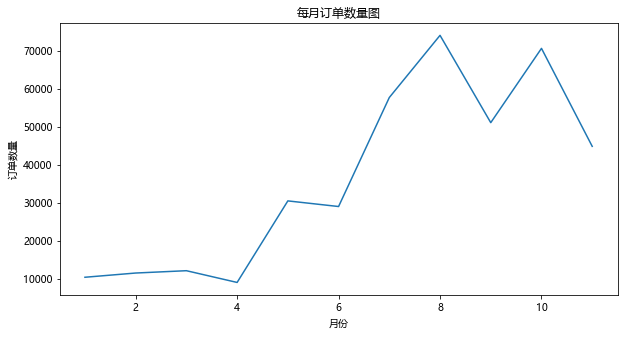

In [35]:
# 1. 每月订单数量的折线图
plt.figure(figsize=(10,5))
plt.plot(df[df['price'] > 0].groupby('Month')['order_id'].nunique())
plt.xlabel('月份')
plt.ylabel('订单数量')
plt.title('每月订单数量图')
plt.show()

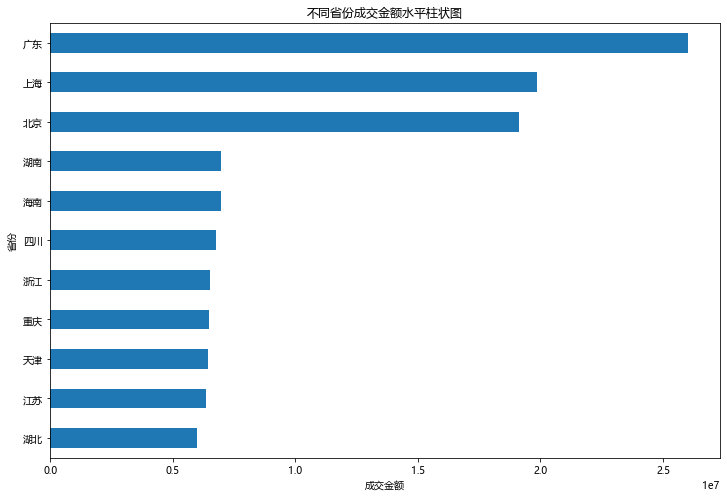

In [33]:
# 2. 不同省份成交金额的水平柱状图
plt.figure(figsize=(12,8))
df[df['price'] > 0].groupby('local')['price'].sum().sort_values(ascending=True).plot.barh()
plt.xlabel('成交金额')
plt.ylabel('省份')
plt.title('不同省份成交金额水平柱状图')
plt.show()

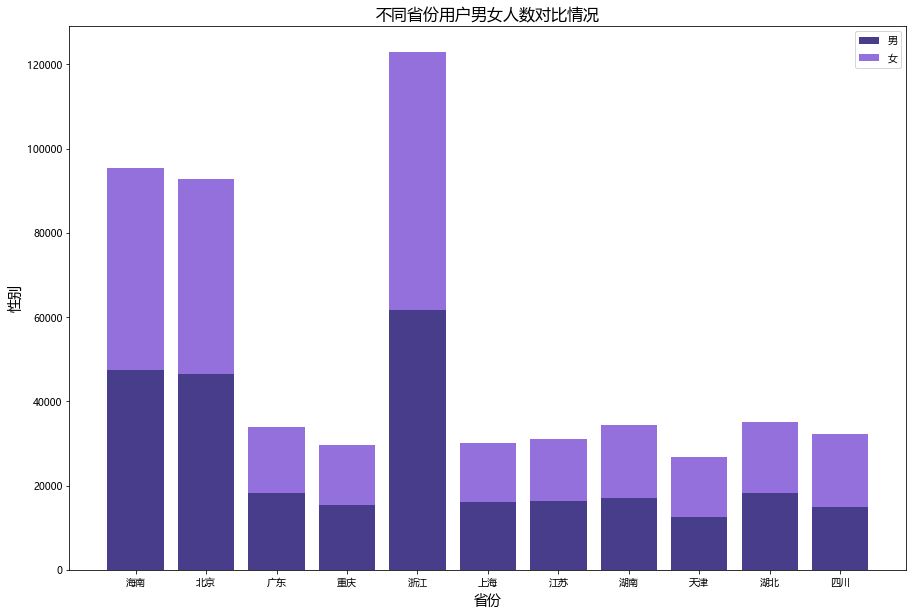

In [34]:
# 3. 不同省份用户男女人数对比簇状柱形图
cities = df.drop_duplicates(['local'])['local']
df_city = [city for city in cities]

plt.figure(figsize=(15,10))
sex_m = df[df[df['price']>0]['sex'] == '男'].groupby('local')['sex'].count()
sex_f = df[df[df['price']>0]['sex'] == '女'].groupby('local')['sex'].count()
plt.bar(df_city,sex_m,color='darkslateblue',label='男')
plt.bar(df_city,sex_f,bottom=sex_m,color='mediumpurple',label='女')
plt.legend(loc='best')
plt.ylabel('性别', size=14)
plt.xlabel('省份', size=14)
plt.title('不同省份用户男女人数对比情况', size=16)
plt.show()